# Part 1. Web Scraping from Reddit.com 

## Importing Libraries

In [2]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
import missingno as msno

# Import API library
import requests
import time
from IPython.display import JSON

## Extracting Title and Thread Info

In [3]:
# Url link of subreddits
url = ["https://www.reddit.com/r/edx.json",
       "https://www.reddit.com/r/coursera.json"]

In [4]:
# Create headers
headers = {'User-agent':'Krisgun Chirasanta'}

In [27]:
# Create an empty list
posts = []
comments = []

# For loop to get the first 50 pages (25 per page)
page = 50

# loop through each url
for u in url:
    
    # Create a starting variable of after to be None
    after = None
    
    # loop through each page
    for i in range(page):
        print(f"Getting post number: {i+1} of {page}")
        if after == None:
            params = {} # First page no need to set after = name
        else:
            params = {'after': after} # Set after = name of last post

        # Set up url and requests with headers and after as param dictionary
        res = requests.get(u, params=params, headers=headers)

        # Check function of response - 200 = OK, else = check status
        if res.status_code == 200:
            
            # Get the post details
            # Get the response
            mac_json = res.json()

            # Add response of each children to `posts`
            posts.extend(mac_json['data']['children'])

            # Set after variable to the name of last post
            after = mac_json['data']['after']
            
            # Get top 5 comments from those posts
            # Get permalinks
            links = [post['data']['permalink'] for post in \
                    mac_json['data']['children']]
            
            # loop through each permalink on current page
            for link in links:
                
                # get url and response.json()
                url_cmt = 'https://www.reddit.com'+link[:-1]+'.json'
                res = requests.get(url_cmt, headers=headers)
                res_cmt = res.json()
                
                # then get top 5 comments from each res and extend to cmt list
                comments.extend(res_cmt[1]['data']['children'][:1])
                
        else:
            # If error print out status_code and break loop
            print(res.status_code)
            break

        # Put sleep time of 1 second
        time.sleep(1)
        
print('done')

Getting post number: 1 of 50
Getting post number: 2 of 50
Getting post number: 3 of 50
Getting post number: 4 of 50
Getting post number: 5 of 50
Getting post number: 6 of 50
Getting post number: 7 of 50
Getting post number: 8 of 50
Getting post number: 9 of 50
Getting post number: 10 of 50
Getting post number: 11 of 50
Getting post number: 12 of 50
Getting post number: 13 of 50
Getting post number: 14 of 50
Getting post number: 15 of 50
Getting post number: 16 of 50
Getting post number: 17 of 50
Getting post number: 18 of 50
Getting post number: 19 of 50
Getting post number: 20 of 50
Getting post number: 21 of 50
Getting post number: 22 of 50
Getting post number: 23 of 50
Getting post number: 24 of 50
Getting post number: 25 of 50
Getting post number: 26 of 50
Getting post number: 27 of 50
Getting post number: 28 of 50
Getting post number: 29 of 50
Getting post number: 30 of 50
Getting post number: 31 of 50
Getting post number: 32 of 50
Getting post number: 33 of 50
Getting post number

In [52]:
# List of features to extract from `posts`
features = ['name','title','selftext','ups','upvote_ratio',\
            'permalink','subreddit']

# Crate empty dictionary
df_dict = {}

# Looping through feature and store in df_dict
for feat in features:
    df_dict[feat] = [post['data'][feat] for post in posts]

# Transform to a dataframe
df = pd.DataFrame(df_dict)

In [53]:
# List of features to extract from `comments`
features = ['link_id','subreddit','body']

# Crate empty dictionary
cmt_dict = {}

# Looping through feature and store in df_dict
for feat in features:
    cmt_dict[feat] = [comment['data'][feat] for comment in comments]

# Transform to a dataframe
cmt_df = pd.DataFrame(cmt_dict)

Check Post DataFrame

In [54]:
# Check head of dataframe
df.head(2)

,name,title,selftext,ups,upvote_ratio,permalink,subreddit
0,t3_y144xh,How to do a Masters in a completely unrelated ...,"Hi guys,\n\nI'm close to finishing my Bachelor...",8,0.90,/r/edX/comments/y144xh/how_to_do_a_masters_in_...,edX
1,t3_y09o1m,The consequences of failing a course after get...,I made a huge mistake!\nI took to courses one ...,10,0.86,/r/edX/comments/y09o1m/the_consequences_of_fai...,edX


In [55]:
# Dropping some duplicates
df.drop_duplicates(subset='name',inplace=True)

In [56]:
# Check shape
df.shape

(1994, 7)

In [57]:
# Check types
df.dtypes

name             object
title            object
selftext         object
ups               int64
upvote_ratio    float64
permalink        object
subreddit        object
dtype: object

In [58]:
# Check selftext
df['selftext'] = df['selftext'].apply(lambda x : x if x != '' else 'empty')

In [59]:
# Check values - 20% of selftext is missing
df[df['selftext']=='empty']['selftext'].count() / df.shape[0]

# Let's keep it for now but consider dropping this column before analysis

0.08676028084252758

In [60]:
# Check head
df.head()

,name,title,selftext,ups,upvote_ratio,permalink,subreddit
0,t3_y144xh,How to do a Masters in a completely unrelated ...,"Hi guys,\n\nI'm close to finishing my Bachelor...",8,0.90,/r/edX/comments/y144xh/how_to_do_a_masters_in_...,edX
1,t3_y09o1m,The consequences of failing a course after get...,I made a huge mistake!\nI took to courses one ...,10,0.86,/r/edX/comments/y09o1m/the_consequences_of_fai...,edX
2,t3_xxluk0,Auditing a Course,"If you audit a course, do you have access to t...",2,0.67,/r/edX/comments/xxluk0/auditing_a_course/,edX
3,t3_xtszjt,APA Format Citation Guide,1. APA Referencing Basics: Reference List\nA r...,3,0.81,/r/edX/comments/xtszjt/apa_format_citation_guide/,edX
4,t3_xtm1ea,Possibility to access old courses?,"Hi, I wonder if there are possibilities to acc...",7,0.79,/r/edX/comments/xtm1ea/possibility_to_access_o...,edX


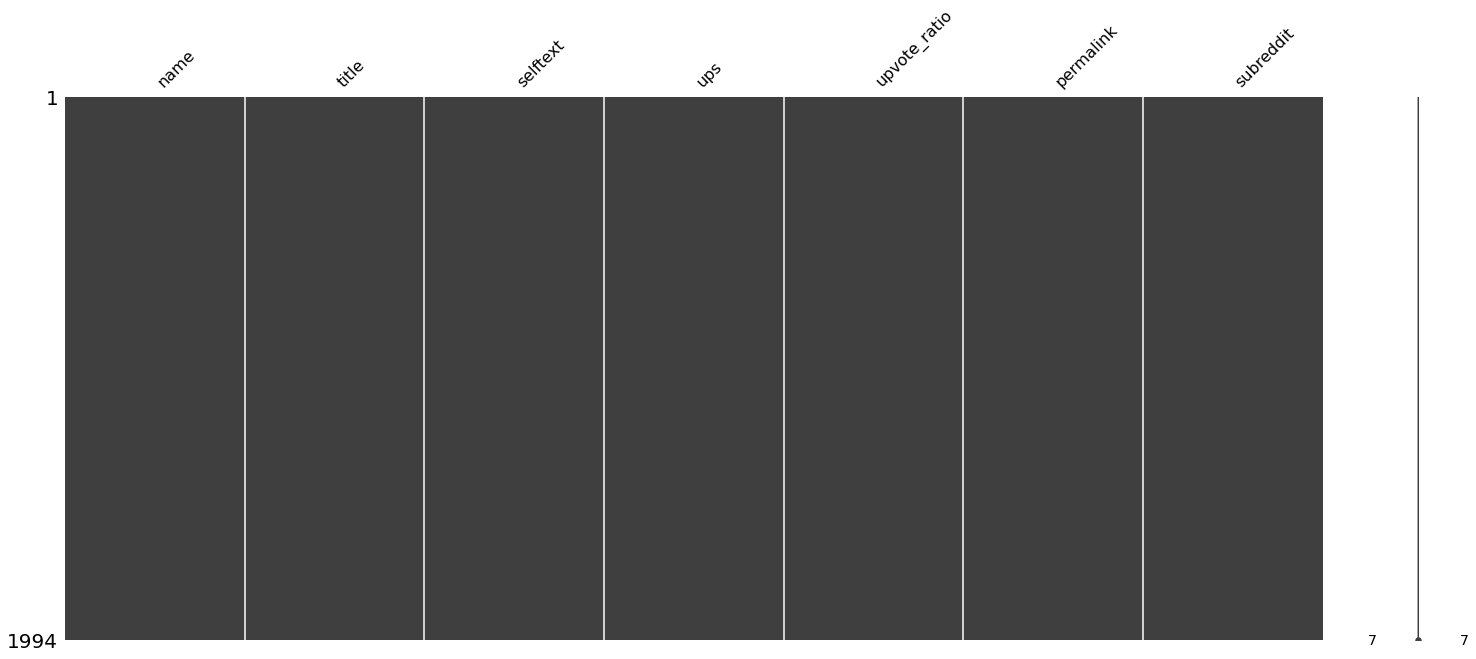

In [61]:
# Check for missing values
msno.matrix(df);

# No missing values

Check Comments DataFrame

In [37]:
# Check shape
cmt_df.shape

(1957, 3)

In [63]:
# Drop duplicates for comments
cmt_df.drop_duplicates(subset='link_id',inplace=True)

In [64]:
# Check subreddit count
cmt_df['subreddit'].value_counts()

coursera    812
edX         770
Name: subreddit, dtype: int64

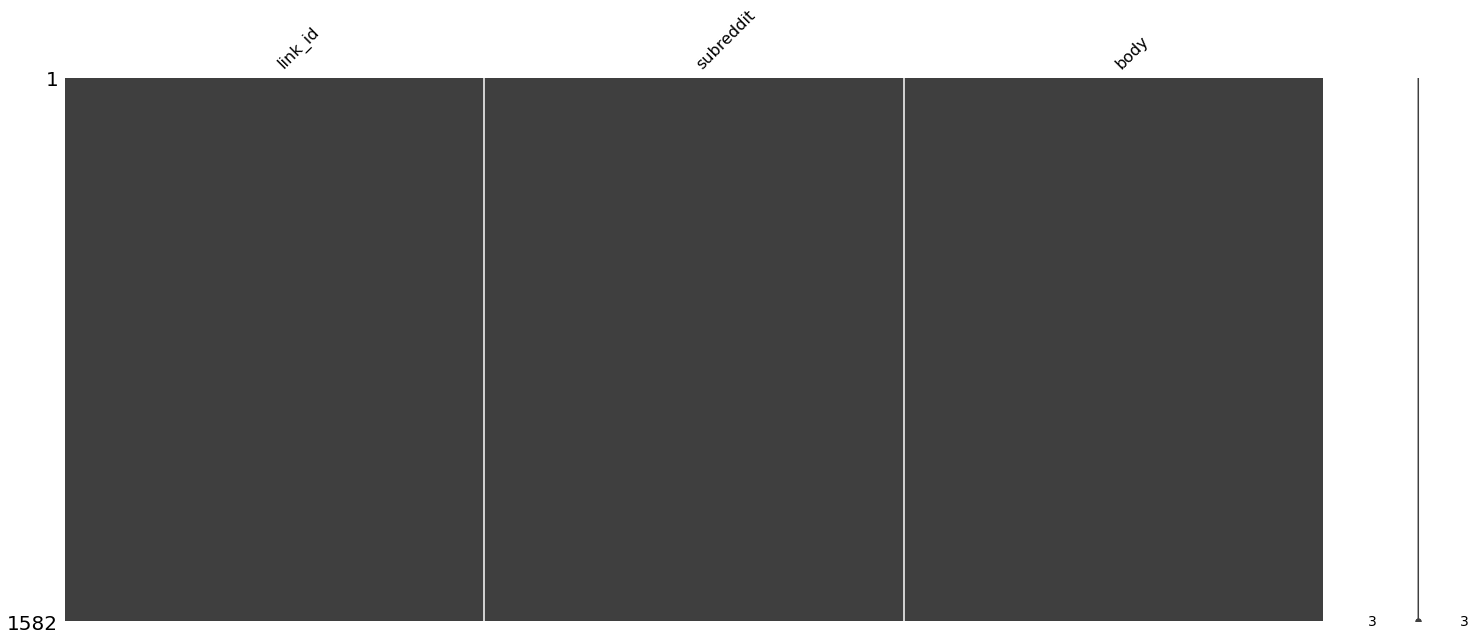

In [65]:
# Check missing value
msno.matrix(cmt_df);

In [66]:
cmt_df.head()

,link_id,subreddit,body
0,t3_y09o1m,edX,"Financial aid just gives u a discount, you sti..."
1,t3_xxluk0,edX,Not necessarily. Assignments are only for cert...
2,t3_xtm1ea,edX,You can just access archived courses even if n...
3,t3_xsaqli,edX,Cs50 python is more about learning the python ...
4,t3_xseepw,edX,I’m taking it. I don’t like it but I will comp...


In [67]:
# Export to csv
df.to_csv('../datasets/coursera_edx_posts_f.csv')
cmt_df.to_csv('../datasets/coursera_edx_comments_f.csv')